# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [ ]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [ ]:
#Seu código aqui para a média
estatic_preco = df.groupby("Categoria")["Preco_Normal"].agg(["mean"]).reset_index()
print(estatic_preco)

                    Categoria         mean
0  belleza-y-cuidado-personal  1783.556485
1          comidas-preparadas  3095.043478
2                  congelados  2108.042553
3                      frutas  1724.473684
4        instantaneos-y-sopas   765.491228
5                     lacteos  2385.219239
6                    verduras  1343.296875


In [ ]:
#Seu código aqui para a mediana
estatic_preco = df.groupby("Categoria")["Preco_Normal"].agg(["median"]).reset_index()
print(estatic_preco)

                    Categoria  median
0  belleza-y-cuidado-personal  1569.0
1          comidas-preparadas  3290.0
2                  congelados  1519.0
3                      frutas  1195.0
4        instantaneos-y-sopas   439.0
5                     lacteos   989.0
6                    verduras  1180.0


Digite aqui as categorias: <br>
As categorias onde a média está acima da mediana geralmente apresentam preços com valores mais extremos, como:
*   Lácteos (média: 2385, mediana: 989).
*   Beleza e Cuidado Pessoal (média: 1783, mediana: 1569).

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [ ]:
#Seu código aqui
estatic_preco["std"] = df.groupby("Categoria")["Preco_Normal"].std().values
maior_desvio_categoria = estatic_preco.loc[estatic_preco["std"].idxmax(), "Categoria"]
print(estatic_preco)

                    Categoria  median          std
0  belleza-y-cuidado-personal  1569.0  2210.041719
1          comidas-preparadas  3290.0  2019.911428
2                  congelados  1519.0  2111.539896
3                      frutas  1195.0  1639.151114
4        instantaneos-y-sopas   439.0  1170.232869
5                     lacteos   989.0  3925.816164
6                    verduras  1180.0  1012.699625


Digite nesse campo o comportamento que você identificou.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

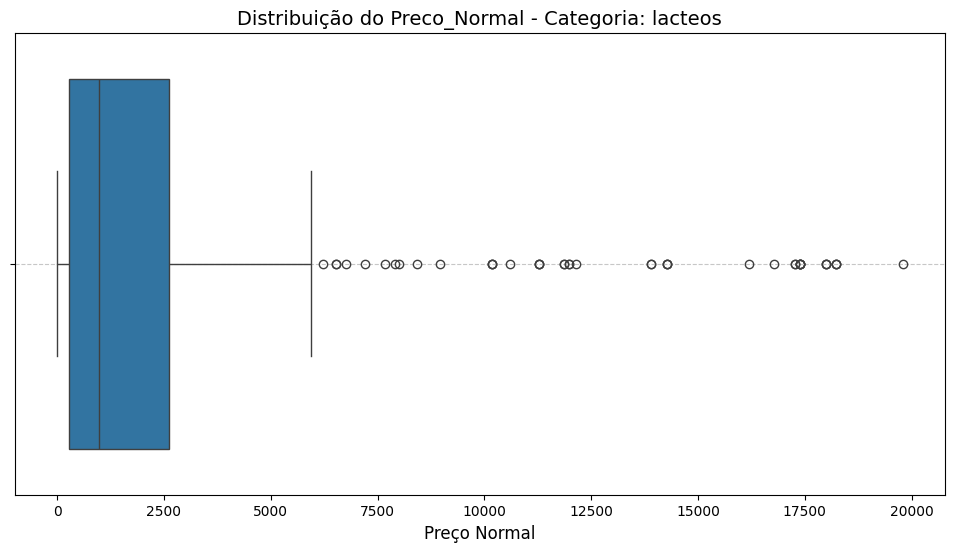

In [ ]:
#Seu código aqui
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["Categoria"] == maior_desvio_categoria], x="Preco_Normal")
plt.title(f"Distribuição do Preco_Normal - Categoria: {maior_desvio_categoria}", fontsize=14)
plt.xlabel("Preço Normal", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

A distribuição apresenta muitos outliers, indicando a existência de produtos com preços muito acima da média.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

<ipython-input-34-5ab46b50315f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=descontos_por_categoria, x="Categoria", y="Desconto", palette="viridis")


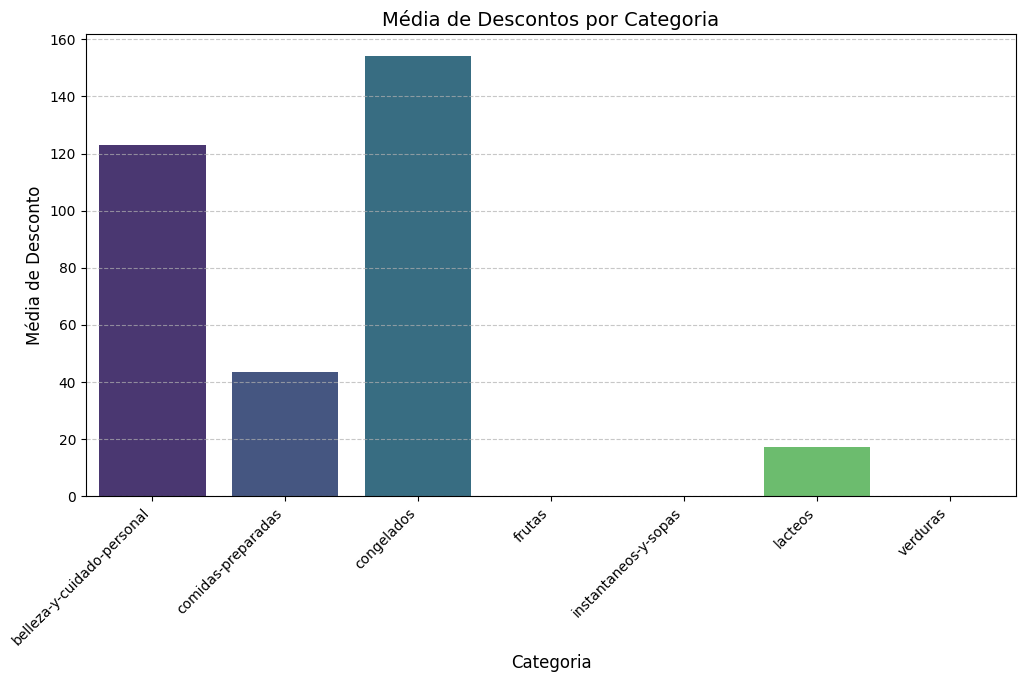

In [ ]:
# Seu código aqui
descontos_por_categoria = df.groupby("Categoria")["Desconto"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=descontos_por_categoria, x="Categoria", y="Desconto", palette="viridis")
plt.title("Média de Descontos por Categoria", fontsize=14)
plt.ylabel("Média de Desconto", fontsize=12)
plt.xlabel("Categoria", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

<ipython-input-37-5ffc10e0c84a>:11: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



<Figure size 1200x800 with 0 Axes>

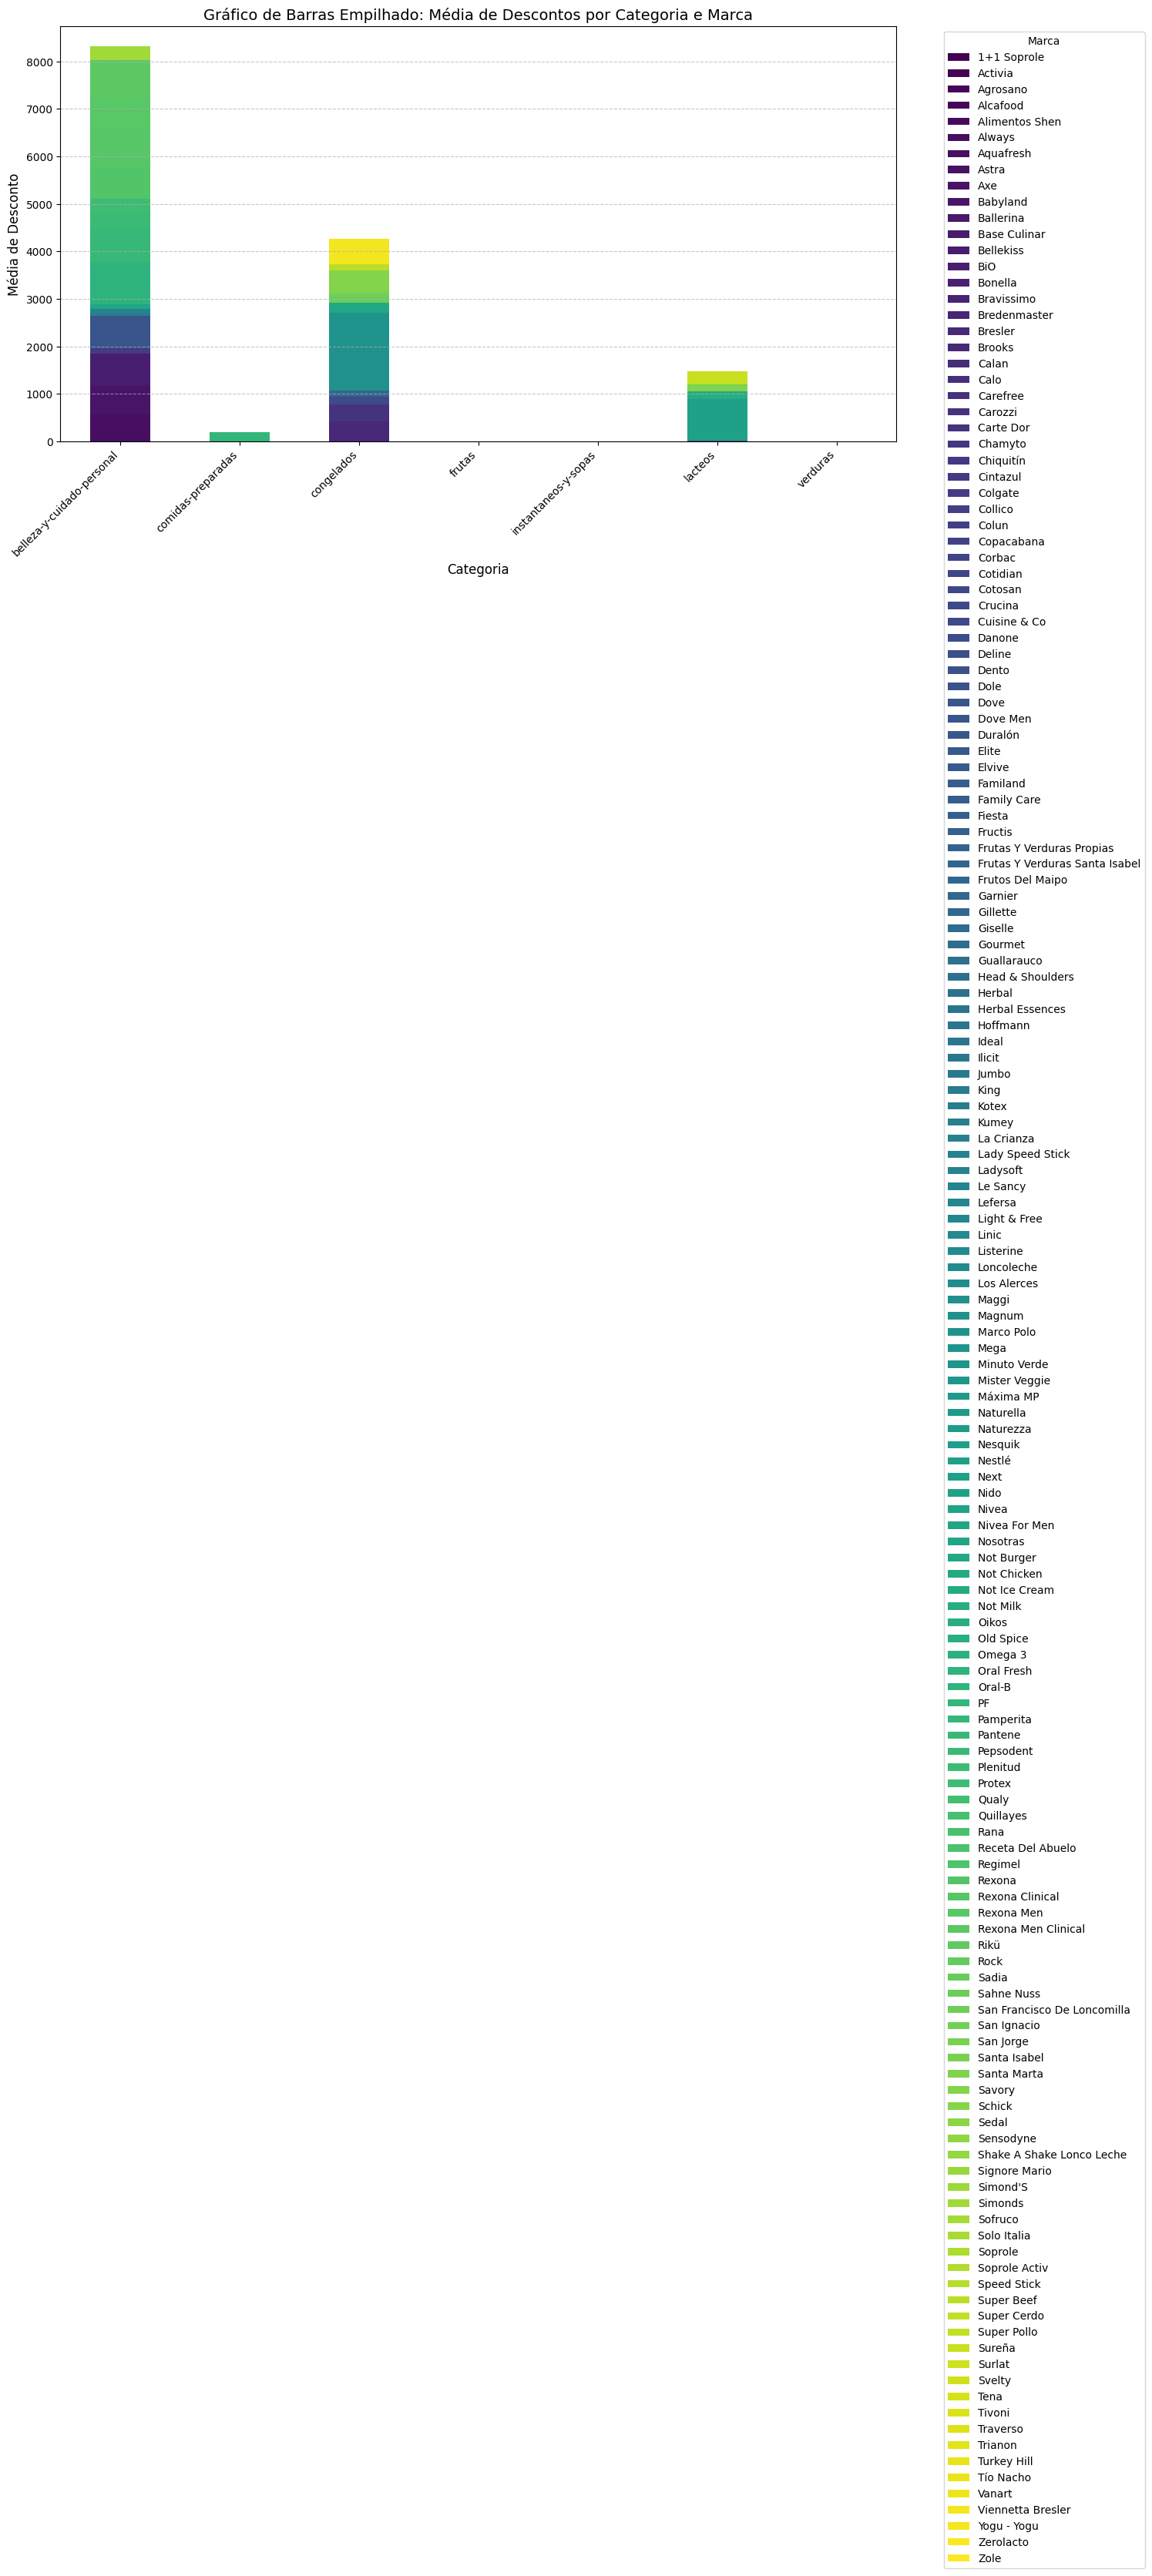

In [ ]:
# Seu código aqui
stacked_data = map_data.pivot(index="Categoria", columns="Marca", values="Desconto").fillna(0)

plt.figure(figsize=(12, 8))
stacked_data.plot(kind="bar", stacked=True, colormap="viridis", figsize=(14, 7))
plt.title("Gráfico de Barras Empilhado: Média de Descontos por Categoria e Marca", fontsize=14)
plt.ylabel("Média de Desconto", fontsize=12)
plt.xlabel("Categoria", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Marca", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()